create a graph showing monthtly job demand for 2023 in USA for certain job_title

In [15]:
from datasets import load_dataset
import pandas as pd 
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#converting object type to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'] )

In [16]:
#creating copy of original data set with filtered condition
df_usa = df[df['job_country']=="United States"].copy()

In [17]:
# creating 2 new columns of month name and number in copied df
df_usa['job_posted_mnth'] = df['job_posted_date'].dt.strftime('%B')
df_usa['job_posted_mnth_num'] = df['job_posted_date'].dt.month

In [18]:
#using pivot to get size(bec it excludes na values) of job posted for each month based on job title
df_usa_pivot = df_usa.pivot_table(index=['job_posted_mnth','job_posted_mnth_num'],columns='job_title_short',aggfunc='size')

In [19]:
df_usa_pivot.reset_index(inplace=True)

In [20]:
#sorting values based on month num
df_usa_pivot.sort_values(by='job_posted_mnth_num',inplace=True)

In [21]:
#etting month name to index 
df_usa_pivot.set_index('job_posted_mnth', inplace=True)

In [22]:
#dropping month num column
df_usa_pivot.drop('job_posted_mnth_num',axis=1,inplace=True)

In [23]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_mnth,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_mnth'>

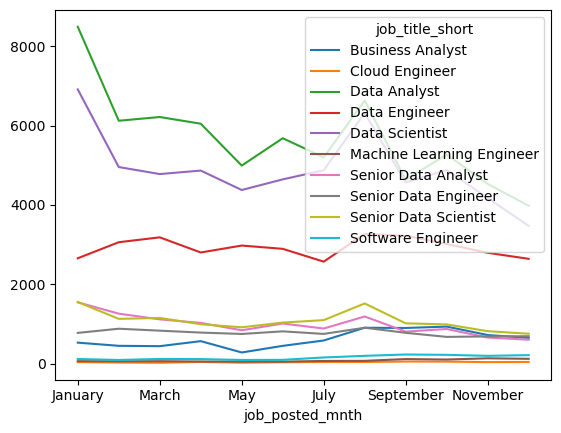

In [24]:
#plotting trend of job posted for each job title
df_usa_pivot.plot()

In [25]:
#creating a list of top 3 job titles that has highest appearance in the df
top = df_usa['job_title_short'].value_counts().head(3)
top = top.index.tolist()

In [26]:
#filtering dataset for only top job titles 
df_usa_pivot = df_usa_pivot[top]
df_usa_pivot


job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_mnth,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


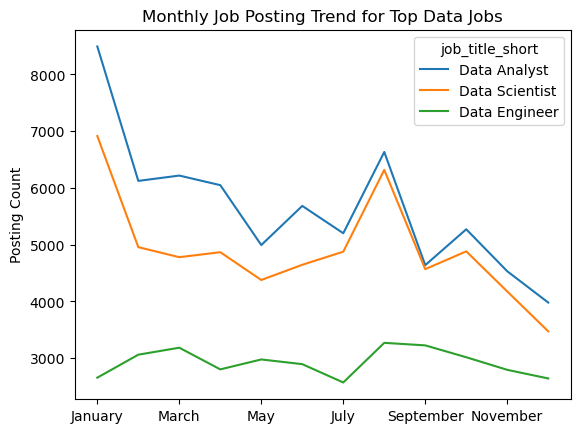

In [27]:
#plotting monthly job posting trend of top 3 data jobs 
df_usa_pivot.plot()
plt.title("Monthly Job Posting Trend for Top Data Jobs")
plt.ylabel("Posting Count")
plt.xlabel("")
plt.show()